In [213]:
## Common Packages
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
import statsmodels.api as sm
import sklearn.model_selection as skm
from ISLP import load_data, confusion_table
from ISLP.models import (ModelSpec as MS,
                         summarize)
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


## Packages for this assignment
from sklearn.tree import (DecisionTreeClassifier as DTC,
                          DecisionTreeRegressor as DTR,
                          plot_tree,
                          export_text)
from sklearn.metrics import (accuracy_score,
                             log_loss)
from sklearn.ensemble import \
     (RandomForestRegressor as RF,
      GradientBoostingRegressor as GBR)
from ISLP.bart import BART
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import f1_score as f1
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import \
     (KMeans,
      AgglomerativeClustering)
from sklearn.metrics.pairwise import euclidean_distances
from ISLP.cluster import compute_linkage
from scipy.cluster.hierarchy import \
     (dendrogram,
      cut_tree)
from statsmodels.datasets import get_rdataset


# Applied Question
## Question 9

In [245]:
USArrests = get_rdataset('USArrests').data
X = USArrests
X

,Murder,Assault,UrbanPop,Rape
rownames,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6
Colorado,7.9,204,78,38.7
Connecticut,3.3,110,77,11.1
Delaware,5.9,238,72,15.8
Florida,15.4,335,80,31.9


### a.

In [246]:
HClust = AgglomerativeClustering
hc_comp = HClust(distance_threshold=0,
                 n_clusters=None,
                 linkage='complete')
hc_comp.fit(X)

AgglomerativeClustering(distance_threshold=0, linkage='complete',
                        n_clusters=None)

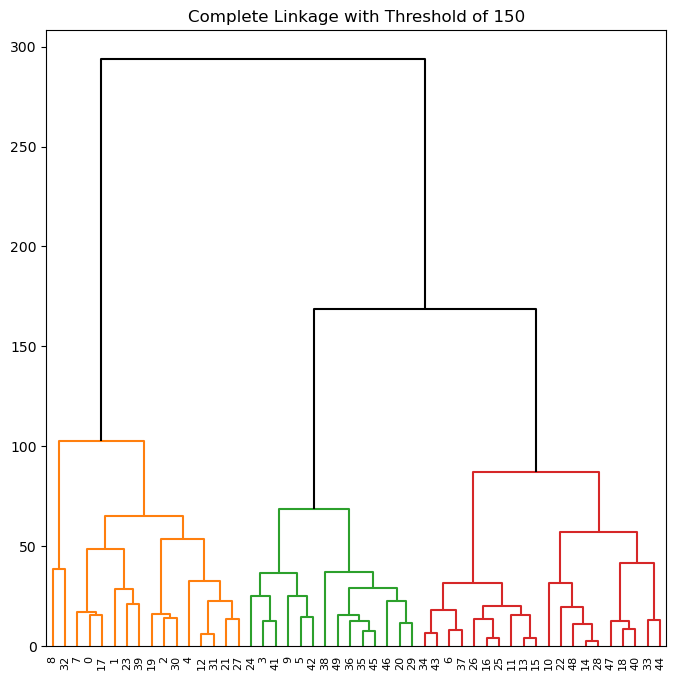

In [247]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
linkage_comp = compute_linkage(hc_comp)
dendrogram(linkage_comp,
           ax=ax,
           color_threshold=150,
           above_threshold_color='black');
ax.set_title("Complete Linkage with Threshold of 150");

### b.

In [248]:
cluster = cut_tree(linkage_comp, n_clusters=3).reshape(-1)
X['cluster'] = cluster

#### Cluster 0

In [249]:
X[X['cluster'] == 0]

,Murder,Assault,UrbanPop,Rape,cluster
rownames,,,,,
Alabama,13.2,236,58,21.2,0
Alaska,10.0,263,48,44.5,0
Arizona,8.1,294,80,31.0,0
California,9.0,276,91,40.6,0
Delaware,5.9,238,72,15.8,0
Florida,15.4,335,80,31.9,0
Illinois,10.4,249,83,24.0,0
Louisiana,15.4,249,66,22.2,0
Maryland,11.3,300,67,27.8,0


#### Cluster 1

In [250]:
X[X['cluster'] == 1]

,Murder,Assault,UrbanPop,Rape,cluster
rownames,,,,,
Arkansas,8.8,190,50,19.5,1
Colorado,7.9,204,78,38.7,1
Georgia,17.4,211,60,25.8,1
Massachusetts,4.4,149,85,16.3,1
Missouri,9.0,178,70,28.2,1
New Jersey,7.4,159,89,18.8,1
Oklahoma,6.6,151,68,20.0,1
Oregon,4.9,159,67,29.3,1
Rhode Island,3.4,174,87,8.3,1


#### Cluster 2

In [251]:
X[X['cluster'] == 2]

,Murder,Assault,UrbanPop,Rape,cluster
rownames,,,,,
Connecticut,3.3,110,77,11.1,2
Hawaii,5.3,46,83,20.2,2
Idaho,2.6,120,54,14.2,2
Indiana,7.2,113,65,21.0,2
Iowa,2.2,56,57,11.3,2
Kansas,6.0,115,66,18.0,2
Kentucky,9.7,109,52,16.3,2
Maine,2.1,83,51,7.8,2
Minnesota,2.7,72,66,14.9,2


### c.

In [252]:
scaler = StandardScaler(with_std=True,
                        with_mean=True)
X_scaled = scaler.fit_transform(USArrests)

In [253]:
HClust = AgglomerativeClustering
hc_comp = HClust(distance_threshold=0,
                 n_clusters=None,
                 linkage='complete')
hc_comp.fit(X_scaled)

AgglomerativeClustering(distance_threshold=0, linkage='complete',
                        n_clusters=None)

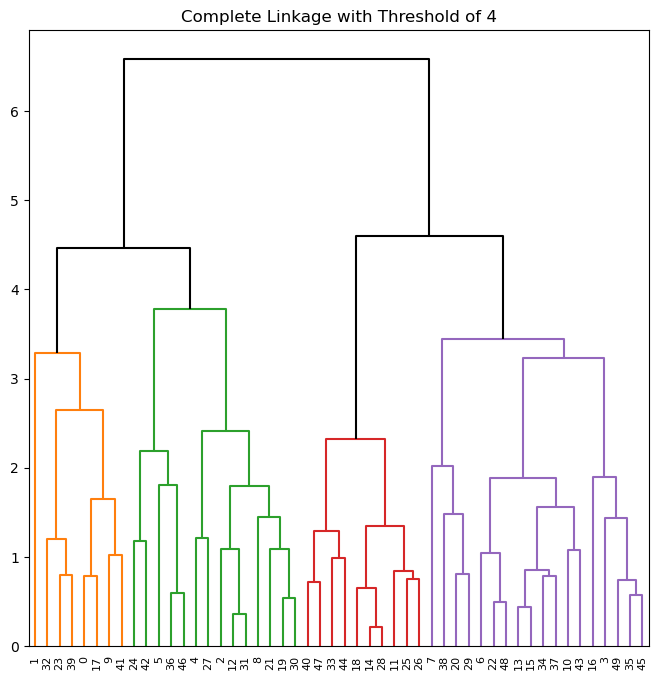

In [254]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
linkage_comp = compute_linkage(hc_comp)
dendrogram(linkage_comp,
           ax=ax,
           color_threshold=4,
           above_threshold_color='black');
ax.set_title("Complete Linkage with Threshold of 4");

In [258]:
cluster = cut_tree(linkage_comp, n_clusters=3).reshape(-1)
X['cluster_scaled'] = cluster

### d.

In [259]:
pd.crosstab(X['cluster'],
            pd.Series(X['cluster_scaled'], name='Scaled'))

Scaled,0,1,2
cluster,,,
0,15,1,0
1,7,7,0
2,0,10,10


# Wine Dataset for Clustering

In [4]:
wine = pd.read_csv('wine-clustering.csv')
wine

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [7]:
print(wine.columns)
print(wine.mean())
print(wine.var())

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline'],
      dtype='object')
Alcohol                  13.000618
Malic_Acid                2.336348
Ash                       2.366517
Ash_Alcanity             19.494944
Magnesium                99.741573
Total_Phenols             2.295112
Flavanoids                2.029270
Nonflavanoid_Phenols      0.361854
Proanthocyanins           1.590899
Color_Intensity           5.058090
Hue                       0.957449
OD280                     2.611685
Proline                 746.893258
dtype: float64
Alcohol                     0.659062
Malic_Acid                  1.248015
Ash                         0.075265
Ash_Alcanity               11.152686
Magnesium                 203.989335
Total_Phenols               0.391690
Flavanoids                  0.997719
Nonflavanoid_Phenols        0.015489
Proanthoc

In [11]:
scaler = StandardScaler(with_std=True,
                        with_mean=True)
wine_scaled = scaler.fit_transform(wine)
wine_scaled

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

## PCA Model

In [19]:
pcaWine = PCA()


In [20]:
pcaWine.fit(wine_scaled)


PCA()

In [22]:
pcaWine.mean_

array([-8.38280756e-16, -1.19754394e-16, -8.37033314e-16, -3.99181312e-17,
       -3.99181312e-17,  0.00000000e+00, -3.99181312e-16,  3.59263181e-16,
       -1.19754394e-16,  2.49488320e-17,  1.99590656e-16,  3.19345050e-16,
       -1.59672525e-16])

In [25]:
scores = pcaWine.transform(wine_scaled)
scores

array([[ 3.31675081e+00,  1.44346263e+00, -1.65739045e-01, ...,
        -4.51563395e-01,  5.40810414e-01, -6.62386309e-02],
       [ 2.20946492e+00, -3.33392887e-01, -2.02645737e+00, ...,
        -1.42657306e-01,  3.88237741e-01,  3.63650247e-03],
       [ 2.51674015e+00,  1.03115130e+00,  9.82818670e-01, ...,
        -2.86672847e-01,  5.83573183e-04,  2.17165104e-02],
       ...,
       [-2.67783946e+00,  2.76089913e+00, -9.40941877e-01, ...,
         5.12492025e-01,  6.98766451e-01,  7.20776948e-02],
       [-2.38701709e+00,  2.29734668e+00, -5.50696197e-01, ...,
         2.99821968e-01,  3.39820654e-01, -2.18657605e-02],
       [-3.20875816e+00,  2.76891957e+00,  1.01391366e+00, ...,
        -2.29964331e-01, -1.88787963e-01, -3.23964720e-01]])

In [207]:
pcaWine.components_[:2,] 


array([[ 0.1443294 , -0.24518758, -0.00205106, -0.23932041,  0.14199204,
         0.39466085,  0.4229343 , -0.2985331 ,  0.31342949, -0.0886167 ,
         0.29671456,  0.37616741,  0.28675223],
       [ 0.48365155,  0.22493093,  0.31606881, -0.0105905 ,  0.299634  ,
         0.06503951, -0.00335981,  0.02877949,  0.03930172,  0.52999567,
        -0.27923515, -0.16449619,  0.36490283]])

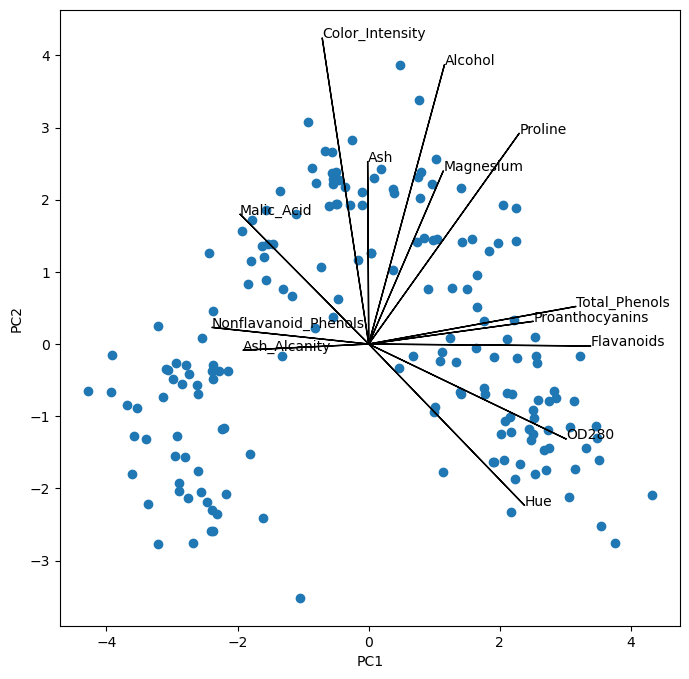

In [32]:
scale_arrow = s_ = 8
scores[:,1] *= -1
pcaUS.components_[1] *= -1 # flip the y-axis
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.scatter(scores[:,0], scores[:,1])
ax.set_xlabel('PC%d' % (i+1))
ax.set_ylabel('PC%d' % (j+1))
for k in range(pcaWine.components_.shape[1]):
    ax.arrow(0, 0, s_*pcaWine.components_[i,k], s_*pcaWine.components_[j,k])
    ax.text(s_*pcaWine.components_[i,k],
            s_*pcaWine.components_[j,k],
            wine.columns[k])


In [33]:
scores.std(0, ddof=1)

array([2.17541651, 1.58463905, 1.20591951, 0.96133546, 0.92630917,
       0.8032946 , 0.74440679, 0.59200192, 0.53899168, 0.50231465,
       0.47651262, 0.41197541, 0.32243138])

In [35]:
pcaWine.explained_variance_


array([4.73243698, 2.51108093, 1.45424187, 0.92416587, 0.85804868,
       0.64528221, 0.55414147, 0.35046627, 0.29051203, 0.25232001,
       0.22706428, 0.16972374, 0.10396199])

In [36]:
%%capture
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
ticks = np.arange(pcaWine.n_components_)+1
ax = axes[0]
ax.plot(ticks,
        pcaWine.explained_variance_ratio_,
        marker='o')
ax.set_xlabel('Principal Component');
ax.set_ylabel('Proportion of Variance Explained')
ax.set_ylim([0,1])
ax.set_xticks(ticks)

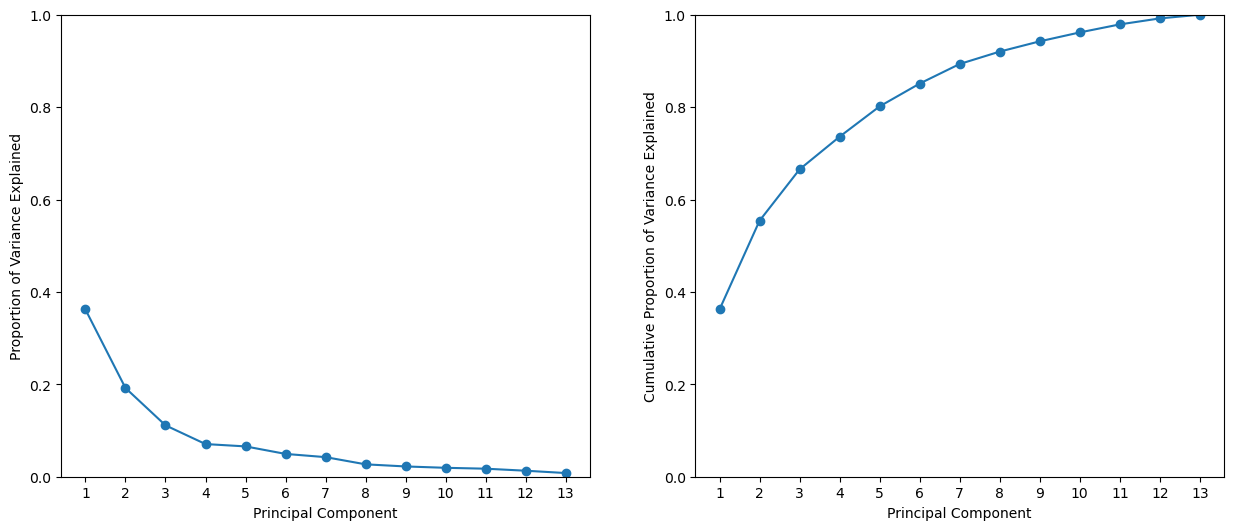

In [37]:
ax = axes[1]
ax.plot(ticks,
        pcaWine.explained_variance_ratio_.cumsum(),
        marker='o')
ax.set_xlabel('Principal Component')
ax.set_ylabel('Cumulative Proportion of Variance Explained')
ax.set_ylim([0, 1])
ax.set_xticks(ticks)
fig

In [208]:
pcaWine.explained_variance_ratio_.cumsum()

array([0.36198848, 0.55406338, 0.66529969, 0.73598999, 0.80162293,
       0.85098116, 0.89336795, 0.92017544, 0.94239698, 0.96169717,
       0.97906553, 0.99204785, 1.        ])

In [38]:
wine80 = PCA(n_components=5)

In [39]:
wineReduced = wine80.fit_transform(wine_scaled)

In [40]:
wineReduced

array([[ 3.31675081e+00,  1.44346263e+00, -1.65739045e-01,
        -2.15631188e-01,  6.93042841e-01],
       [ 2.20946492e+00, -3.33392887e-01, -2.02645737e+00,
        -2.91358318e-01, -2.57654635e-01],
       [ 2.51674015e+00,  1.03115130e+00,  9.82818670e-01,
         7.24902309e-01, -2.51033118e-01],
       [ 3.75706561e+00,  2.75637191e+00, -1.76191842e-01,
         5.67983308e-01, -3.11841591e-01],
       [ 1.00890849e+00,  8.69830821e-01,  2.02668822e+00,
        -4.09765788e-01,  2.98457503e-01],
       [ 3.05025392e+00,  2.12240111e+00, -6.29395827e-01,
        -5.15637495e-01, -6.32018734e-01],
       [ 2.44908967e+00,  1.17485013e+00, -9.77094891e-01,
        -6.58305046e-02, -1.02776191e+00],
       [ 2.05943687e+00,  1.60896307e+00,  1.46281883e-01,
        -1.19260801e+00,  7.69034938e-02],
       [ 2.51087430e+00,  9.18070957e-01, -1.77096903e+00,
         5.62703612e-02, -8.92256977e-01],
       [ 2.75362819e+00,  7.89437674e-01, -9.84247490e-01,
         3.49381568e-01

## Kmeans

In [209]:
kmeans = KMeans(n_clusters=2,
                random_state=2,
                n_init=100).fit(wineReduced[:, :2])

C:\Users\charl\.conda\envs\ISLP\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


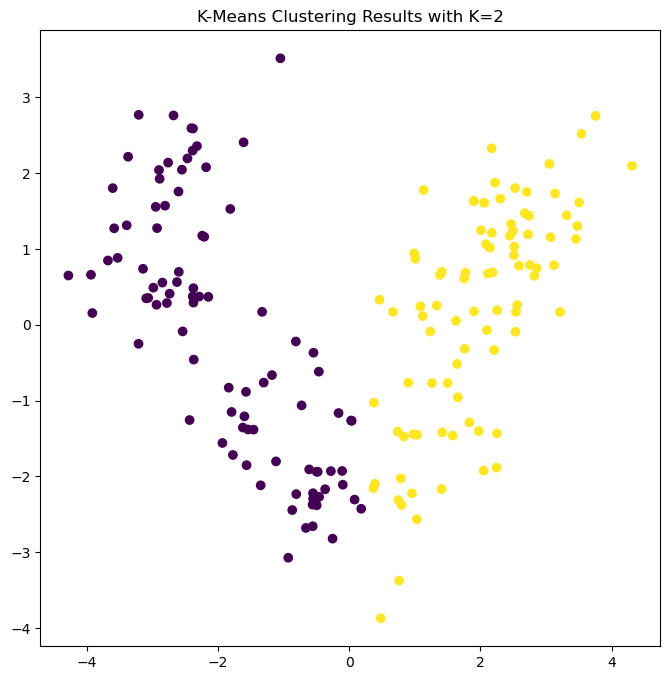

In [210]:
fig, ax = plt.subplots(1, 1, figsize=(8,8))
ax.scatter(wineReduced[:,0], wineReduced[:,1], c=kmeans.labels_)
ax.set_title("K-Means Clustering Results with K=2");

In [58]:
kmeans.inertia_

628.7883507554772

C:\Users\charl\.conda\envs\ISLP\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


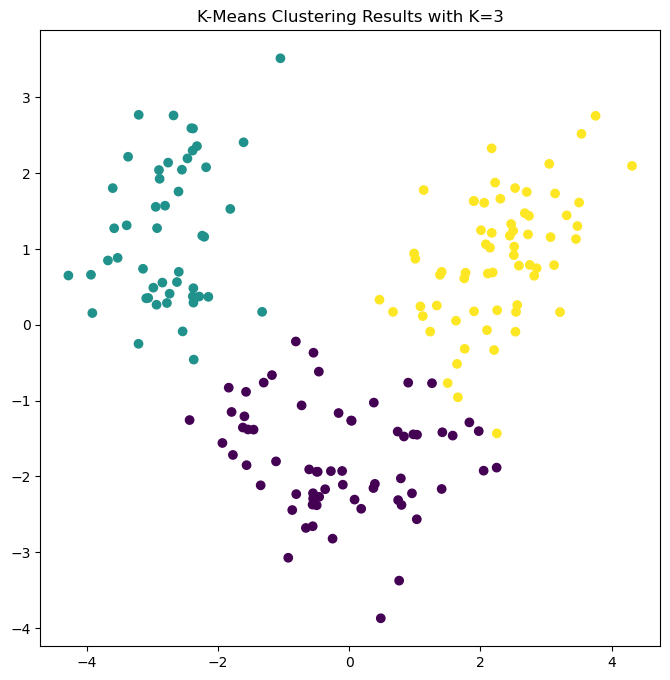

In [211]:
kmeans = KMeans(n_clusters=3,
                random_state=3,
                n_init=100).fit(wineReduced[:,:2])
fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(wineReduced[:,0], wineReduced[:,1], c=kmeans.labels_)
ax.set_title("K-Means Clustering Results with K=3");

In [60]:
kmeans.inertia_

259.50938075119325

In [157]:
Kmax = 51
K = range(2,Kmax)
print(K)
SSwclust = np.zeros_like(K)
max_dist = np.zeros_like(K)
avg_dist = np.zeros_like(K)
min_dist = np.zeros_like(K)
med_dist = np.zeros_like(K)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=3, n_init=500).fit(wineReduced)
    SSwclust[k-2] = kmeans.inertia_
    dists = euclidean_distances(kmeans.cluster_centers_)
    tri_dists = dists[np.triu_indices(k, 1)]
    max_dist[k-2], avg_dist[k-2], min_dist[k-2], med_dist[k-2] = tri_dists.max(), tri_dists.mean(), tri_dists.min(), np.median(tri_dists)

range(2, 51)


C:\Users\charl\.conda\envs\ISLP\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\charl\.conda\envs\ISLP\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\charl\.conda\envs\ISLP\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\charl\.conda\envs\ISLP\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to 

Text(0, 0.5, 'Total within-cluster sum of squares')

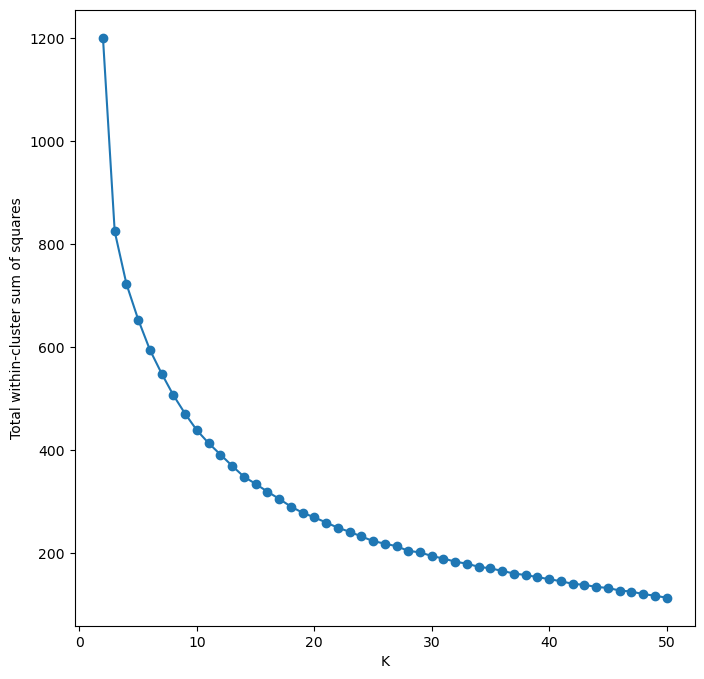

In [158]:
fig, ax = plt.subplots(figsize=(8,8))
ax.plot(K, SSwclust, marker='o')
ax.set_xlabel('K')
ax.set_ylabel('Total within-cluster sum of squares')




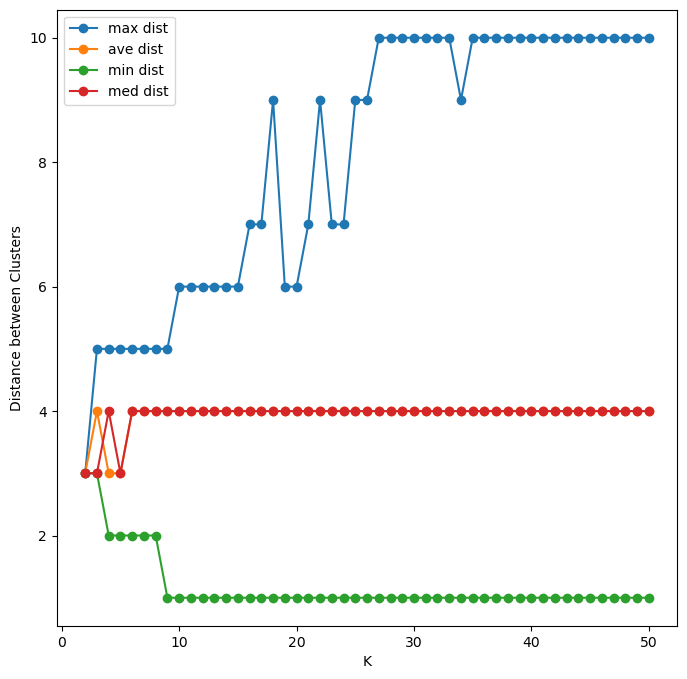

In [159]:
fig, ax = plt.subplots(figsize=(8,8))
ax.plot(K, max_dist, marker='o', label='max dist')
ax.plot(K, avg_dist, marker='o', label='ave dist')
ax.plot(K, min_dist, marker='o', label='min dist')
ax.plot(K, med_dist, marker='o', label='med dist')
ax.set_xlabel('K')
ax.set_ylabel('Distance between Clusters')
ax.legend();

## Hierarchical Clustering

In [181]:
HClust = AgglomerativeClustering
hc_comp = HClust(distance_threshold=0,
                 n_clusters=None,
                 linkage='complete')
hc_comp.fit(wineReduced)

AgglomerativeClustering(distance_threshold=0, linkage='complete',
                        n_clusters=None)

In [182]:
hc_avg = HClust(distance_threshold=0,
                n_clusters=None,
                linkage='average');
hc_avg.fit(wineReduced)
hc_sing = HClust(distance_threshold=0,
                 n_clusters=None,
                 linkage='single');
hc_sing.fit(wineReduced);

In [183]:
D = np.zeros((wineReduced.shape[0], wineReduced.shape[0]));
for i in range(wineReduced.shape[0]):
    x_ = np.multiply.outer(np.ones(wineReduced.shape[0]), wineReduced[i])
    D[i] = np.sqrt(np.sum((wineReduced - x_)**2, 1));
hc_sing_pre = HClust(distance_threshold=0,
                     n_clusters=None,
                     metric='precomputed',
                     linkage='single')
hc_sing_pre.fit(D)


AgglomerativeClustering(distance_threshold=0, linkage='single',
                        metric='precomputed', n_clusters=None)

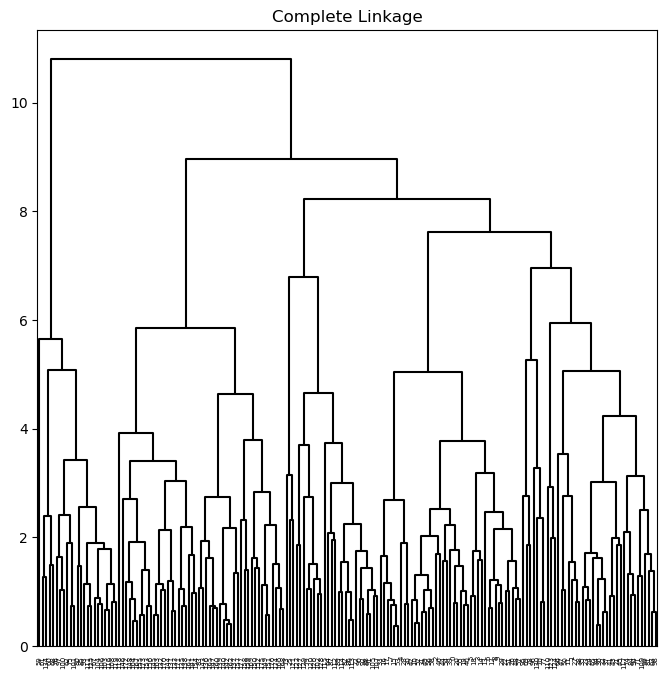

In [185]:
cargs = {'color_threshold':-np.inf,
         'above_threshold_color':'black'}
linkage_comp = compute_linkage(hc_comp)
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
dendrogram(linkage_comp,
           ax=ax,
           **cargs);
ax.set_title("Complete Linkage");


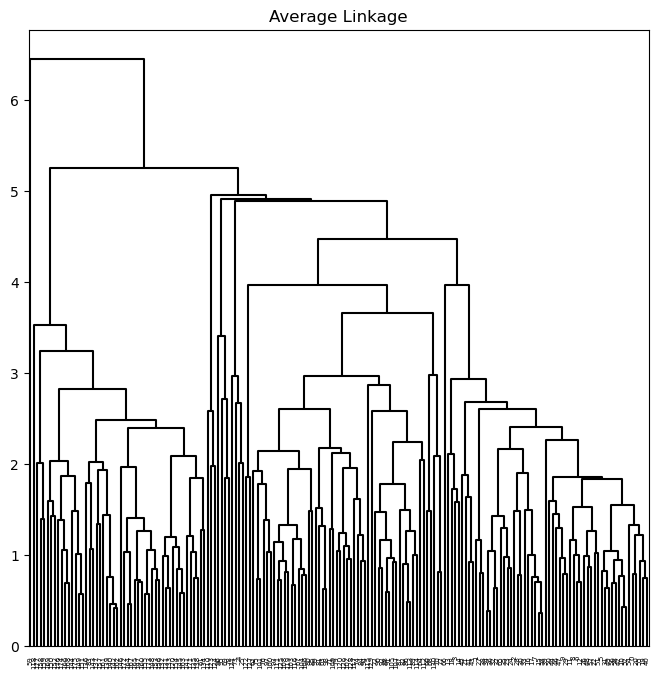

In [186]:
cargs = {'color_threshold':-np.inf,
         'above_threshold_color':'black'}
linkage_comp = compute_linkage(hc_avg)
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
dendrogram(linkage_comp,
           ax=ax,
           **cargs);
ax.set_title("Average Linkage");


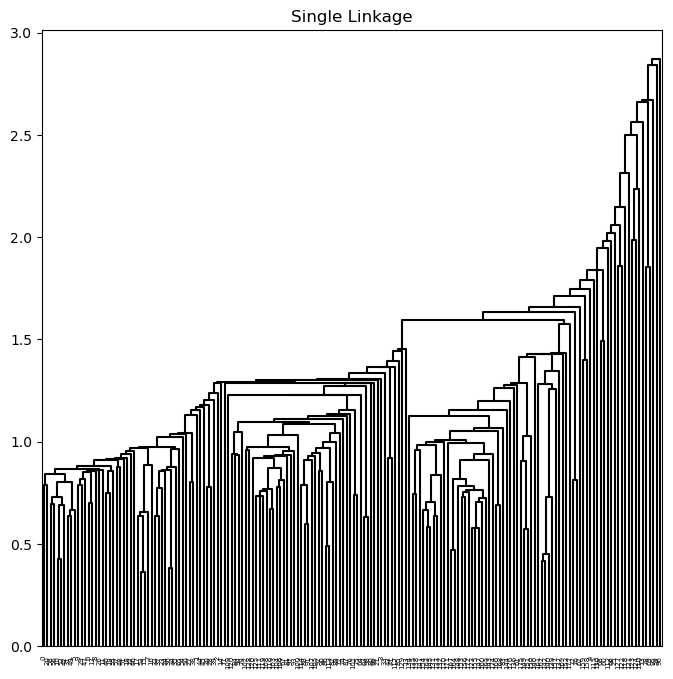

In [187]:
cargs = {'color_threshold':-np.inf,
         'above_threshold_color':'black'}
linkage_comp = compute_linkage(hc_sing)
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
dendrogram(linkage_comp,
           ax=ax,
           **cargs);
ax.set_title("Single Linkage");


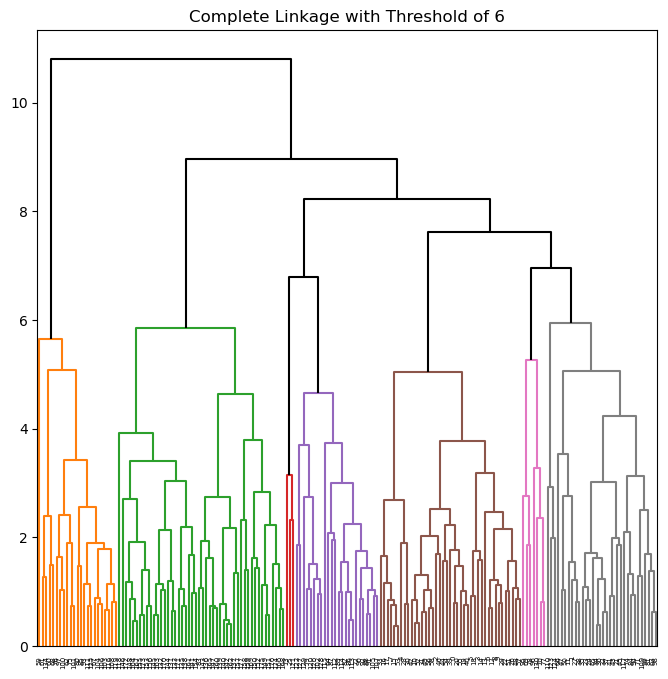

In [188]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
linkage_comp = compute_linkage(hc_comp)
dendrogram(linkage_comp,
           ax=ax,
           color_threshold=6,
           above_threshold_color='black');
ax.set_title("Complete Linkage with Threshold of 6");

In [189]:
cut_tree(linkage_comp, n_clusters=7).T


array([[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 1, 1, 2, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1,
        0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 1, 2, 1,
        1, 3, 3, 4, 4, 1, 2, 2, 1, 3, 3, 4, 4, 2, 3, 1, 2, 5, 1, 3, 2, 2,
        2, 2, 2, 2, 2, 3, 1, 4, 4, 3, 1, 1, 3, 3, 2, 3, 3, 2, 3, 2, 3, 1,
        1, 3, 2, 2, 2, 2, 3, 1, 5, 3, 2, 2, 2, 1, 1, 3, 2, 2, 2, 2, 4, 5,
        5, 5, 3, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
        5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
        5, 5]], dtype=int64)

In [190]:
cut_tree(linkage_comp, height=6)


array([[0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [2],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [3],
       [3],
       [3],
       [3],
       [1],
       [4],
       [1],
       [1],
       [3],
       [3],
       [5],
       [5],
       [1],
       [4],
       [2],
       [1],
       [3],
       [3],
       [5],
       [5],
       [4],
       [3],
       [1],
       [4],
    

## Re-scale PCA Data

In [191]:
wineReducedScaled = scaler.fit_transform(wineReduced)

### Hierarchical Clustering

In [192]:
HClust = AgglomerativeClustering
hc_comp = HClust(distance_threshold=0,
                 n_clusters=None,
                 linkage='complete')
hc_comp.fit(wineReducedScaled)

AgglomerativeClustering(distance_threshold=0, linkage='complete',
                        n_clusters=None)

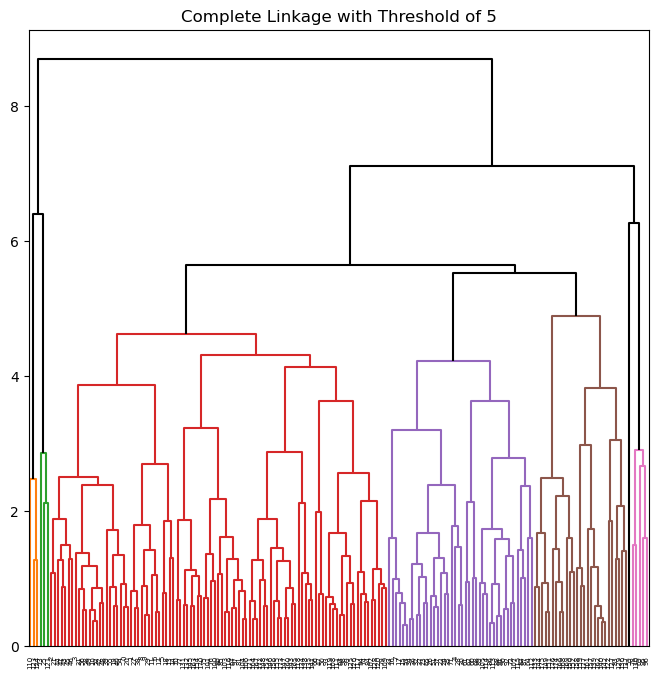

In [194]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
linkage_comp = compute_linkage(hc_comp)
dendrogram(linkage_comp,
           ax=ax,
           color_threshold=5,
           above_threshold_color='black');
ax.set_title("Complete Linkage with Threshold of 5");

### K-means

In [195]:
Kmax = 51
K = range(2,Kmax)
print(K)
SSwclust = np.zeros_like(K)
max_dist = np.zeros_like(K)
avg_dist = np.zeros_like(K)
min_dist = np.zeros_like(K)
med_dist = np.zeros_like(K)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=3, n_init=500).fit(wineReducedScaled)
    SSwclust[k-2] = kmeans.inertia_
    dists = euclidean_distances(kmeans.cluster_centers_)
    tri_dists = dists[np.triu_indices(k, 1)]
    max_dist[k-2], avg_dist[k-2], min_dist[k-2], med_dist[k-2] = tri_dists.max(), tri_dists.mean(), tri_dists.min(), np.median(tri_dists)

range(2, 51)


C:\Users\charl\.conda\envs\ISLP\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\charl\.conda\envs\ISLP\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\charl\.conda\envs\ISLP\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\charl\.conda\envs\ISLP\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to 

In [199]:
tri_dists
tri_dists.max(), tri_dists.mean(), tri_dists.min(), np.median(tri_dists)

(8.694090614315567, 3.5107946742358265, 0.954667902710481, 3.3418828341581284)

Text(0, 0.5, 'Total within-cluster sum of squares')

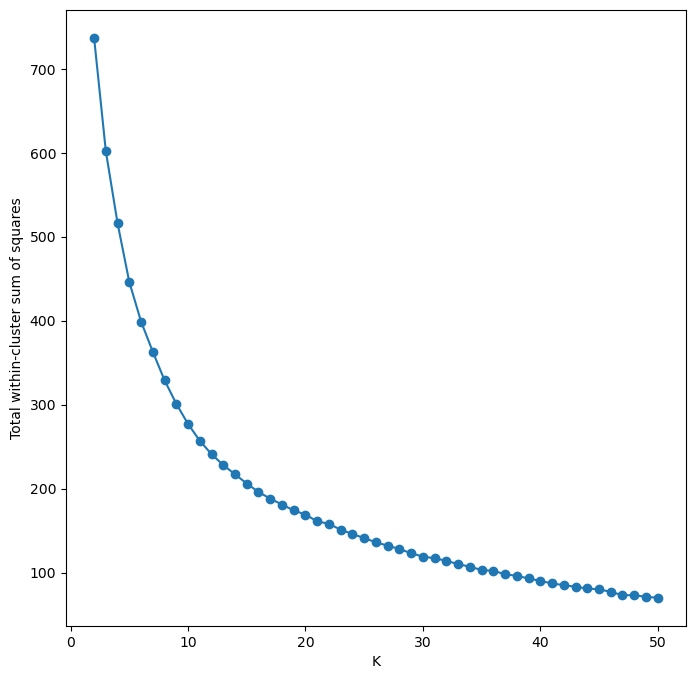

In [196]:
fig, ax = plt.subplots(figsize=(8,8))
ax.plot(K, SSwclust, marker='o')
ax.set_xlabel('K')
ax.set_ylabel('Total within-cluster sum of squares')




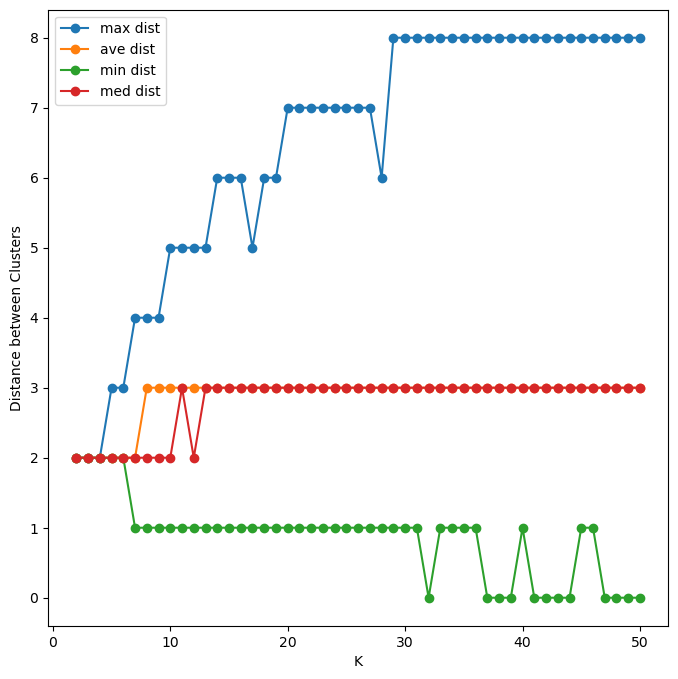

In [204]:
fig, ax = plt.subplots(figsize=(8,8))
ax.plot(K, max_dist, marker='o', label='max dist')
ax.plot(K, avg_dist, marker='o', label='ave dist')
ax.plot(K, min_dist, marker='o', label='min dist')
ax.plot(K, med_dist, marker='o', label='med dist')
ax.set_xlabel('K')
ax.set_ylabel('Distance between Clusters')
ax.legend();